In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 12
import seaborn as sns

In [2]:
# pip install plotnine # 시각화 라이브러리 => R에서 시각화하는 방법과 유사하게 시각화한다.
from plotnine import *
import missingno as msno

In [3]:
%pwd

'C:\\DevData\\python\\dataAnalysis\\workspace'

In [4]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9224-C514

 C:\DevData\python\dataAnalysis\workspace 디렉터리

2023-09-04  오후 12:49    <DIR>          .
2023-09-04  오후 12:49    <DIR>          ..
2023-09-04  오전 11:25    <DIR>          .ipynb_checkpoints
2023-08-28  오후 03:24             7,317 00_numpy_0_axis.ipynb
2023-08-28  오후 02:55           122,240 01_numpy_1.ipynb
2023-08-29  오후 04:59            39,490 02_numpy_2.ipynb
2023-08-29  오후 06:22            59,073 03_numpy_3.ipynb
2023-08-30  오전 11:18            82,058 04_pandas_1.ipynb
2023-08-30  오후 06:45            79,281 05_pandas_2.ipynb
2023-08-31  오후 04:34           152,789 06_pandas_3.ipynb
2023-08-31  오후 12:18           117,392 07_pandas_4.ipynb
2023-08-31  오후 03:39           109,387 08_pandas_5.ipynb
2023-09-04  오전 11:27            31,549 09_pandas_6.ipynb
2023-09-01  오전 10:00            46,631 10_pandas_7.ipynb
2023-09-01  오전 11:56           137,764 11_matplotlib_hangle.ipynb
2023-09-01  오후 02:32            64,825 12_anscombe.ipynb
2023-09-01  오후

2015년 10월부터 2023년 6월까지 주택분양보증을 받아 분양한 전체 민간 신규 아파트 분양가격 동향  
공공데이터포털(https://www.data.go.kr/)에서 '민간 아파트' 검색  


In [5]:
# read_csv() 메소드로 csv 파일을 읽을 때 csv 파일의 한글 인코딩 문제로 pd.read_csv('파일명')와 같이 읽을 때
# 아래와 같은 UnicodeDecodeError 에러가 발생할 수 있다.
# per_sale = pd.read_csv('./data/perSale_2023_06.csv')
per_sale = pd.read_csv('./data/perSale_2023_06.csv', encoding='euc-kr', engine='python')
per_sale.shape

(7905, 5)

In [6]:
per_sale.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터)
7900,제주,모든면적,2023,6,7326
7901,제주,전용면적 60제곱미터이하,2023,6,7381
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,7084
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,6639
7904,제주,전용면적 102제곱미터초과,2023,6,7506


encoding 옵션을 지정하지 않고 사용하려면 csv 파일을 메모장으로 열고 파일 메뉴의 다른 이름으로 저장을 선택하고  
인코딩 방식을 ANSI에서 UTF-8로 변경한 후 덮어쓰기로 저장하면 된다.

In [28]:
# per_sale = pd.read_csv('./data/perSale_2023_06.csv')
# per_sale
# per_sale.shape

dtype 속성이나 info() 메소드를 이용해서 데이터프레임을 구성하는 데이터 타입을 확인하고 필요하다면 변경한다.

In [8]:
per_sale.dtypes

지역명           object
규모구분          object
연도             int64
월              int64
분양가격(제곱미터)    object
dtype: object

In [9]:
per_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


In [10]:
# 연도와 월은 연산에 사용되는 데이터가 아니라 구분에 사용되는 카테고리 형태의 데이터이므로 문자열로 변환한다.
# per_sale['연도'] = per_sale['연도'].astype(str)
# per_sale['연도'] = per_sale.get('연도').astype(str)
per_sale['연도'] = per_sale.연도.astype(str)
# 데이터프레임의 특정 열 1개를 얻어올 때 '데이터프레임[열]', '데이터프레임.get(열)', '데이터프레임.열' 방식이
# 모두 사용 가능하지만 데이터프레임의 특정 열에 데이터를 넣어줄 때는 '데이터프레임.get(열)'은 에러가 발생한다.
# per_sale['월'] = per_sale['월'].astype(str)
# per_sale['월'] = per_sale.get('월').astype(str)
per_sale['월'] = per_sale.월.astype(str)

In [11]:
per_sale.dtypes

지역명           object
규모구분          object
연도            object
월             object
분양가격(제곱미터)    object
dtype: object

In [12]:
# 분양가격(제곱미터)는 연산에 사용할 데이터이므로 숫자로 변경한다.
# per_sale['분양가격(제곱미터)'] = per_sale['분양가격(제곱미터)'].astype(float) # 에러 발생(could not convert string to float)
# astype() 메소드는 문자열을 숫자로 변경하려는 경우 숫자가 아닌 문자열이 있으면 에러가 발생된다.
# 이때, to_numeric() 메소드를 사용하면 어느 정도 오류를 제어할 수 있다.
# to_numeric() 메소드의 errors 속성은 기본값이 raise로 숫자로 변경할 수 없는 값이 있으면 오류를 발생시킨다.
# errors 속성값을 ignore를 사용하면 숫자로 변경할 수 없는 값이 있을 때 메소드를 무시한다.
# errors 속성값을 coerce를 사용하면 숫자로 변경할 수 없는 값이 있으면 데이터를 누락값으로 변경한다.
per_sale['분양가격(제곱미터)'] = pd.to_numeric(per_sale['분양가격(제곱미터)'], errors='coerce')
# 작년 데이터에는 '분양가격(제곱미터)'열에 '6,493'형태로 입력돼서 누락값으로 처리되는 문제가 발생됐다.
# csv 파일을 엑셀로 열어서 데이터 서식을 

In [13]:
per_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
dtype: object

In [14]:
# 숫자로 변경된 '분양가격(제곱미터)'열을 이용해서 평당 분양 가격을 계산한 열을 추가한다.
per_sale['평당분양가격'] = per_sale['분양가격(제곱미터)'] * 3.3
print(per_sale.dtypes)
per_sale

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
평당분양가격        float64
dtype: object


,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
7900,제주,모든면적,2023,6,7326.0,24175.8
7901,제주,전용면적 60제곱미터이하,2023,6,7381.0,24357.3
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,7084.0,23377.2
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,6639.0,21908.7


In [15]:
per_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [16]:
# isnull() 메소드와 sum() 메소드를 사용해서 누락값이 존재하는가 확인하기
print(per_sale.isnull().sum())

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    583
평당분양가격        583
dtype: int64


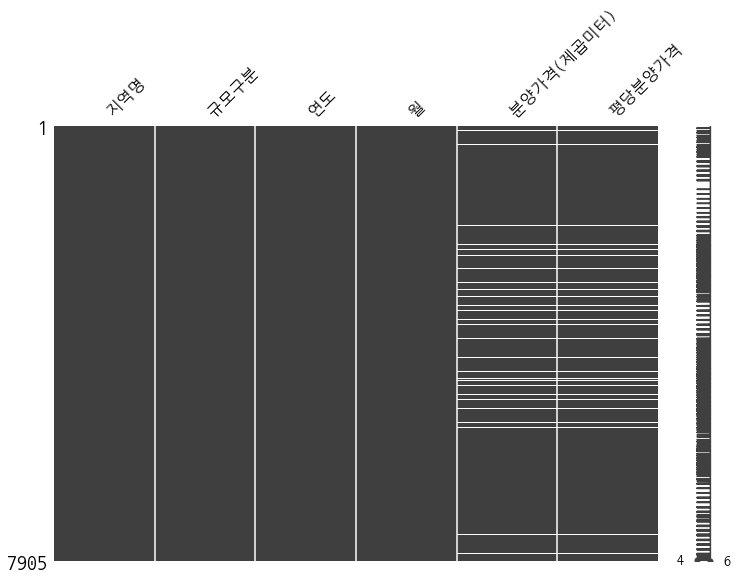

In [20]:
# missingno 라이브러리로 그래프를 그려서 누락값의 위치 확인하기 => 중간 중간 흰색으로 보이는 부분이 누락값이다.
msno.matrix(per_sale, figsize=(12, 8))
plt.show()

In [22]:
# 2017년 데이터만 추출한다.
per_sale_2017 = per_sale[per_sale['연도'] == '2017']
# pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
per_sale_2017

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
1275,서울,모든면적,2017,1,6450.0,21285.0
1276,서울,전용면적 60제곱미터이하,2017,1,6662.0,21984.6
1277,서울,전용면적 60제곱미터초과 85제곱미터이하,2017,1,6500.0,21450.0
1278,서울,전용면적 85제곱미터초과 102제곱미터이하,2017,1,7030.0,23199.0
1279,서울,전용면적 102제곱미터초과,2017,1,6771.0,22344.3
...,...,...,...,...,...,...
2290,제주,모든면적,2017,12,3578.0,11807.4
2291,제주,전용면적 60제곱미터이하,2017,12,5380.0,17754.0
2292,제주,전용면적 60제곱미터초과 85제곱미터이하,2017,12,3467.0,11441.1
2293,제주,전용면적 85제곱미터초과 102제곱미터이하,2017,12,NaN,NaN


In [23]:
per_sale['지역명'].value_counts

충남    465
경남    465
경북    465
서울    465
충북    465
광주    465
전북    465
대구    465
강원    465
인천    465
경기    465
부산    465
전남    465
제주    465
대전    465
세종    465
울산    465
Name: 지역명, dtype: int64

In [24]:
# 규모구분별 데이터가 동일하게 저장되어 있다.
per_sale['규모구분'].value_counts()

전용면적 102제곱미터초과             1581
전용면적 60제곱미터초과 85제곱미터이하     1581
전용면적 60제곱미터이하              1581
전용면적 85제곱미터초과 102제곱미터이하    1581
모든면적                       1581
Name: 규모구분, dtype: int64

전국 연도별 평균 분양 가격

In [33]:
# per_sale.groupby(per_sale['연도'])['평당분양가격'].mean()
per_sale.groupby(per_sale['연도']).평당분양가격.mean()

연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16277.103106
Name: 평당분양가격, dtype: float64

In [38]:
# pd.options.display.float_format 속성을 사용해서 데이터프레임에 저장된 실수 데이터의 출력 서식을 지정할 수 있다.
# f를 붙이지 않으면 지수 기호 'e'를 사용하는 지수 형태로 표시된다.
pd.options.display.float_format = '{:,.1f}'.format # 서식 지정 {:.1f} => float으로만 쓰겠다 / {:,.1f} => 천단위 콤마

In [39]:
per_sale

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60제곱미터이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102제곱미터초과,2015,10,"5,879.0","19,400.7"
...,...,...,...,...,...,...
7900,제주,모든면적,2023,6,"7,326.0","24,175.8"
7901,제주,전용면적 60제곱미터이하,2023,6,"7,381.0","24,357.3"
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"7,084.0","23,377.2"
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,"6,639.0","21,908.7"


In [35]:
# describe() 메소드로 데이터프레임 숫자 데이터가 저장된 열의 요약 통계량을 확인할 수 있다. => 숫자만 나오고 object는 X
per_sale.groupby(per_sale['연도']).describe()

분양가격(제곱미터)                                                             \
          count         mean          std     min     25%     50%      75%   
연도                                                                           
2015      243.0  2788.707819   976.861182  1868.0  2225.0  2516.0  3025.50   
2016      984.0  2934.250000  1071.441561  1900.0  2282.0  2672.0  3148.50   
2017      975.0  3143.311795  1110.515671  1976.0  2373.0  2838.0  3466.00   
2018      919.0  3326.951034  1186.090839  2076.0  2525.0  2952.0  3698.00   
2019      912.0  3693.422149  1563.205566  2124.0  2635.5  3395.0  4066.25   
2020      882.0  3951.340136  1632.748747  2297.0  2780.5  3734.5  4441.00   
2021      945.0  4132.128042  1567.691411  2409.0  3057.0  3858.0  4539.00   
2022      979.0  4528.031665  1521.734776  2657.0  3284.5  4189.0  5231.50   
2023      483.0  4932.455487  1681.541213  2785.0  3625.0  4659.0  5756.00   

              평당분양가격                                                         \
          max  count          mean          std     min       25%       50%   
연도                                                                            
2015   7092.0  243.0   9202.735802  3223.641902  6164.4   7342.50   8302.80   
2016   8096.0  984.0   9683.025000  3535.757150  6270.0   7530.60   8817.60   
2017   7887.0  975.0  10372.928923  3664.701713  6520.8   7830.90   9365.40   
2018   8098.0  919.0  10978.938411  3914.099768  6850.8   8332.50   9741.60   
2019  12728.0  912.0  12188.293092  5158.578369  7009.2   8697.15  11203.50   
2020  13835.0  882.0  13039.422449  5388.070866  7580.1   9175.65  12323.85   
2021  10746.0  945.0  13636.022540  5173.381656  7949.7  10088.10  12731.40   
2022  10322.0  979.0  14942.504494  5021.724760  8768.1  10838.85  13823.70   
2023  11911.0  483.0  16277.103106  5549.086002  9190.5  11962.50  15374.70   

                          
            75%      max  
연도                        
2015   9984.150  23403.6  
2016  10390.050  26716.8  
2017  11437.800  26027.1  
2018  12203.400  26723.4  
2019  13418.625  42002.4  
2020  14655.300  45655.5  
2021  14978.700  35461.8  
2022  17263.950  34062.6  
2023  18994.800  39306.3

In [41]:
# describe() 메소드 실행 결과를 'T' 속성을 지정해서 전치시켜서 요약 통계량을 아래 방향으로 출력할 수 있다.
per_sale.groupby(per_sale['연도']).describe().T

연도                   2015     2016     2017     2018     2019     2020  \
분양가격(제곱미터) count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   2,788.7  2,934.2  3,143.3  3,327.0  3,693.4  3,951.3   
           std      976.9  1,071.4  1,110.5  1,186.1  1,563.2  1,632.7   
           min    1,868.0  1,900.0  1,976.0  2,076.0  2,124.0  2,297.0   
           25%    2,225.0  2,282.0  2,373.0  2,525.0  2,635.5  2,780.5   
           50%    2,516.0  2,672.0  2,838.0  2,952.0  3,395.0  3,734.5   
           75%    3,025.5  3,148.5  3,466.0  3,698.0  4,066.2  4,441.0   
           max    7,092.0  8,096.0  7,887.0  8,098.0 12,728.0 13,835.0   
평당분양가격     count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   9,202.7  9,683.0 10,372.9 10,978.9 12,188.3 13,039.4   
           std    3,223.6  3,535.8  3,664.7  3,914.1  5,158.6  5,388.1   
           min    6,164.4  6,270.0  6,520.8  6,850.8  7,009.2  7,580.1   
           25%    7,342.5  7,530.6  7,830.9  8,332.5  8,697.1  9,175.6   
           50%    8,302.8  8,817.6  9,365.4  9,741.6 11,203.5 12,323.8   
           75%    9,984.1 10,390.0 11,437.8 12,203.4 13,418.6 14,655.3   
           max   23,403.6 26,716.8 26,027.1 26,723.4 42,002.4 45,655.5   

연도                   2021     2022     2023  
분양가격(제곱미터) count    945.0    979.0    483.0  
           mean   4,132.1  4,528.0  4,932.5  
           std    1,567.7  1,521.7  1,681.5  
           min    2,409.0  2,657.0  2,785.0  
           25%    3,057.0  3,284.5  3,625.0  
           50%    3,858.0  4,189.0  4,659.0  
           75%    4,539.0  5,231.5  5,756.0  
           max   10,746.0 10,322.0 11,911.0  
평당분양가격     count    945.0    979.0    483.0  
           mean  13,636.0 14,942.5 16,277.1  
           std    5,173.4  5,021.7  5,549.1  
           min    7,949.7  8,768.1  9,190.5  
           25%   10,088.1 10,838.8 11,962.5  
           50%   12,731.4 13,823.7 15,374.7  
           75%   14,978.7 17,263.9 18,994.8  
           max   35,461.8 34,062.6 39,306.3

전국 규모별 연도별 평균 평당 분양 가격

In [48]:
# pivot_table() 메소드는 엑셀의 피벗 테이블과 유사한 형태로 데이터를 리턴한다.
# pivot_table(value, index[, columns, aggfunc, fill_value])
# value: 피벗 테이블을 작성할 데이터프레임의 열을 지정한다.
# index: 그룹화의 첫번 째 기준으로 사용할 데이터프레임의 열을 지정한다. => 행 단위 그룹화
# columns: 그룹화의 두번 째 기준으로 사용할 데이터프레임의 열을 지정한다. => 열 단위 그룹화
# aggfunc: 그룹화 된 결과에 적용할 함수를 지정한다. mean이 기본값, count, sum, min, max, std, median 등 사용 가능
# fill_value: 피벗 테이블에 표시되는 NaN을 대체할 데이터를 지정한다. 주로 0을 사용한다.
per_sale_pivot = per_sale.pivot_table('평당분양가격', '규모구분', '연도', aggfunc='mean')
per_sale_pivot

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
규모구분,,,,,,,,,
모든면적,"8,893.0","9,293.0","9,927.3","10,675.8","11,602.7","12,317.7","13,706.9","14,690.3","15,918.6"
전용면적 102제곱미터초과,"9,837.2","10,388.7","11,311.2","11,445.6","13,331.5","14,068.4","14,380.8","15,990.6","17,272.7"
전용면적 60제곱미터이하,"8,951.5","9,398.9","10,271.4","10,844.4","11,506.8","12,400.8","12,983.8","13,948.0","16,230.7"
전용면적 60제곱미터초과 85제곱미터이하,"8,891.8","9,296.0","9,840.4","10,650.6","11,677.2","12,327.5","13,644.4","14,695.2","15,673.3"
전용면적 85제곱미터초과 102제곱미터이하,"9,518.5","10,122.4","10,573.4","11,441.7","12,980.7","14,759.6","13,532.1","15,523.5","16,378.5"


전국 지역별 평균 평당 분양 가격

In [50]:
# 규모 구분이 모든 면적으로 되어있는 평균 평당 분양 가격으로 연도별 변동 금액을 살펴보자.
region_year_all = per_sale[per_sale['규모구분'] == '모든면적']
region_year_all

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
5,인천,모든면적,2015,10,"3,163.0","10,437.9"
10,경기,모든면적,2015,10,"3,138.0","10,355.4"
15,부산,모든면적,2015,10,"3,112.0","10,269.6"
20,대구,모든면적,2015,10,"2,682.0","8,850.6"
...,...,...,...,...,...,...
7880,전북,모든면적,2023,6,"3,371.0","11,124.3"
7885,전남,모든면적,2023,6,"3,402.0","11,226.6"
7890,경북,모든면적,2023,6,"3,830.0","12,639.0"
7895,경남,모든면적,2023,6,"3,532.0","11,655.6"


In [72]:
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도')
region_year
# 아래에 보이는 지역명은 인덱스이다.

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역명,,,,,,,,,
강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"
대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2"
대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5"
부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2"
서울,"19,725.2","20,663.5","21,425.2","22,889.4","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6"


In [ ]:
# ------------------------------------------ 실행 시 여기부터 다시

In [127]:
# pivot_table() 메소드의 실행 결과는 2번째 인수(index)가 피벗 테이블의 index로 사용되므로 기존 index를 데이터로
# 사용하고 index를 다시 지정하려면 pivot_table() 메소드의 실행 결과에 reset_index() 메소드를 실행하면 된다.
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"
5,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2"
6,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5"
7,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2"
8,서울,"19,725.2","20,663.5","21,425.2","22,889.4","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6"
9,세종,"8,750.5","8,860.5","9,133.0","10,354.8","11,078.9","11,355.3","12,561.2","11,397.4","12,279.3"


In [128]:
print(region_year.columns) # 열 인덱스를 얻어온다.
print(region_year.columns.name) # 열 인덱스의 이름을 얻어온다.
# 아래의 columns에는 열 인덱스를 제외한 10개의 컬럼만 넣을 수 있다. 11개 넣으면 에러 발생
region_year.columns = ['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년',
       '2023년']
print(region_year.columns)
region_year.columns.name = '일련번호'
region_year.head()

Index(['지역명', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object', name='연도')
연도
Index(['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년',
       '2022년', '2023년'],
      dtype='object')


일련번호,지역,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [129]:
# rename() 메소드로 특정 컬럼 이름을 선택해서 변경할 수 있다. => 위 방법(region_year.columns = [])은 전체 열 변경 방법이다.
region_year = region_year.rename(columns={'지역': '지역이름'})
region_year.head()

일련번호,지역이름,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [130]:
# inplace=True 옵션을 저장하면 함수가 실행된 결과를 다시 저장하지 않아도 데이터프레임에 반영된다.
# 쉽게 말해서 region_year = 을 써서 따로 변수에 넣어주지 않고 바로 실행할 때 inplace=True를 쓰면 계속 저장이 된다는 것
region_year.rename(columns={'지역이름': '시도'}, inplace=True)
region_year.head()

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [131]:
print(list(region_year.index))
# 데이터프레임의 index 속성에 리스트 형태로 인덱스 이름을 넘겨서 전체 인덱스를 일괄적으로 변경할 수 있다.
region_year.index = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']
print(region_year.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16'],
      dtype='object')


In [132]:
# rename() 함수로 특정 인덱스 이름을 선택해서 변경할 수 있다.
region_year.rename(index={'00': '영번째', '01': '첫번째'}, inplace=True)
region_year.head()

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
영번째,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
첫번째,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
02,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
03,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
04,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [133]:
# 특정 인덱스에 접근할 때 인덱싱을 사용할 수 있다.
print(region_year.columns[0])
print(region_year.index[0])

시도
영번째


In [134]:
for i in range(17):
    region_year.rename(index={region_year.index[i]: i}, inplace=True)
region_year.head()

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


전국 지역별 평균 분양 가격 변동 금액

In [135]:
region_year['변동액'] = region_year['2023년'] - region_year['2015년']
region_year

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,변동액
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9","5,616.1"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5","8,015.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4","4,221.8"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4","5,329.5"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5","8,981.5"
5,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2","7,973.9"
6,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5","7,758.3"
7,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2","9,336.2"
8,서울,"19,725.2","20,663.5","21,425.2","22,889.4","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6","11,164.4"
9,세종,"8,750.5","8,860.5","9,133.0","10,354.8","11,078.9","11,355.3","12,561.2","11,397.4","12,279.3","3,528.8"


In [142]:
'''
region_year.max()
region_year.groupby('시도').변동액.max()
'''
max_delta_price = np.max(region_year['변동액'])
print(max_delta_price)
sido = region_year[region_year['변동액'] == max_delta_price]['시도'].values[0]
print(sido)

print('2015년부터 2023년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 {}이고 상승액은 평당 {:,.0f}원이다.'.format(sido, max_delta_price * 1000))

16144.149999999994
제주
2015년부터 2023년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이고 상승액은 평당 16,144,150원이다.


In [144]:
min_delta_price = np.min(region_year['변동액'])
print(min_delta_price)
sido = region_year[region_year['변동액'] == min_delta_price]['시도'].values[0]
print(sido)

print('2015년부터 2023년까지 분양가는 계속 상승했으며, 상승액이 가장 작은 지역은 {}이고 상승액은 평당 {:,.0f}원이다.'.format(sido, max_delta_price * 1000))

3528.800000000001
세종
2015년부터 2023년까지 분양가는 계속 상승했으며, 상승액이 가장 작은 지역은 세종이고 상승액은 평당 16,144,150원이다.


plotnine 라이브러리를 이용한 시각화

In [147]:
region_year_all.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
5,인천,모든면적,2015,10,"3,163.0","10,437.9"
10,경기,모든면적,2015,10,"3,138.0","10,355.4"
15,부산,모든면적,2015,10,"3,112.0","10,269.6"
20,대구,모든면적,2015,10,"2,682.0","8,850.6"


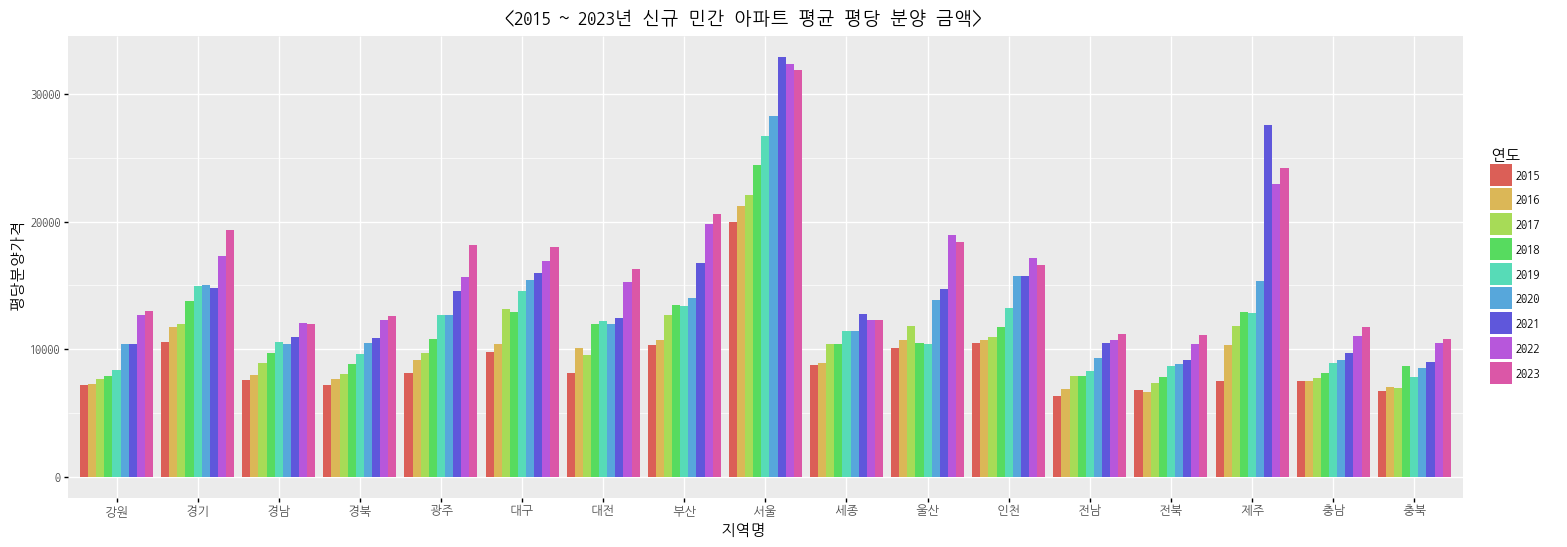

<ggplot: (-9223371947673512248)>

In [210]:
# 연도별 평균 평당 분양 금액 시각화
# ggplot(데이터프레임, aes(x=x축, y=y축, fill='범례')) # 차트 배경을 만든다. => 데이터를 넣어주는 것이 아니라 그냥 배경
#   + 차트함수() # 차트 배경 위에 차트를 만든다.

# ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도')) + geom_bar(stat='identity') # 누적 막대 그래프
# +로 연결할 때 옆으로 너무 길어지면 엔터쳐서 아래로 쓸 수 있는데 '\'를 빼먹으면 unexpected indent 에러가 발생한다.
ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도')) \
    + geom_bar(stat='identity', position='dodge') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(18, 6)) \
    + ggtitle('<2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 금액>')

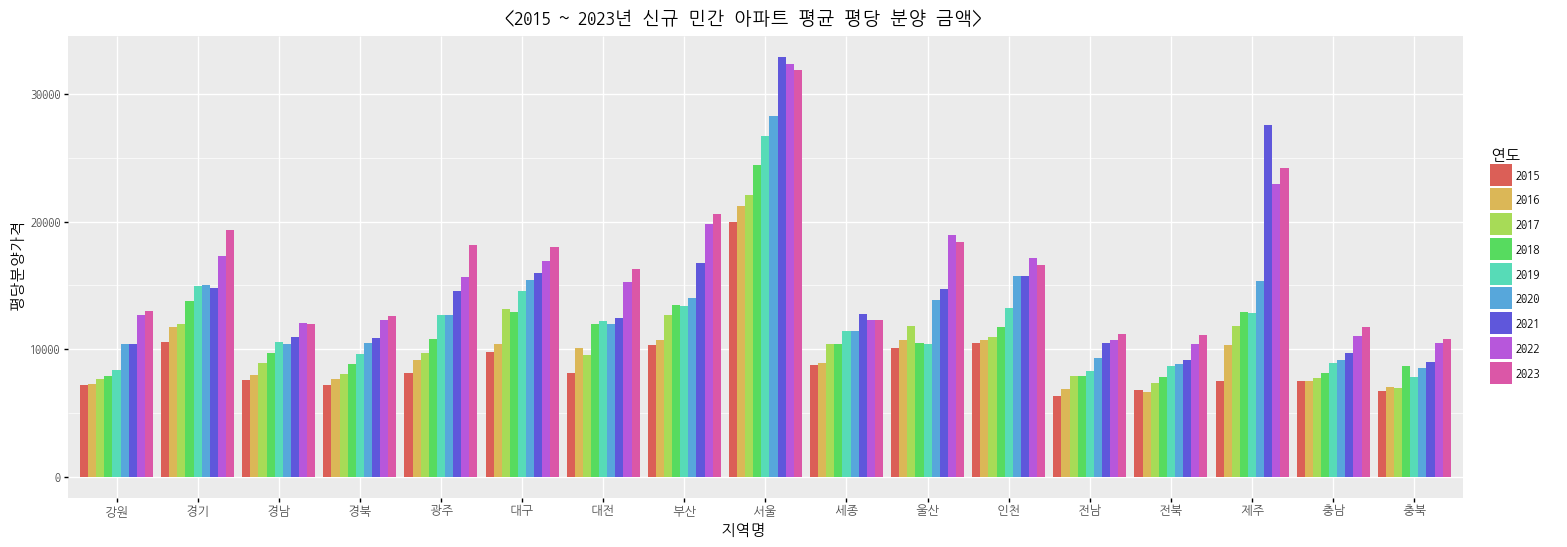

<ggplot: (89181019645)>

In [211]:
# '\'를 안 쓰고 싶다면 ggplot 전체를 ()로 묶어주면 된다.
(
    ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
    + geom_bar(stat='identity', position='dodge')
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(18, 6))
    + ggtitle('<2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 금액>')
)

In [180]:
per_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60제곱미터이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102제곱미터초과,2015,10,"5,879.0","19,400.7"


In [189]:
# 규모별 지역별 평당 분양 금액 합계 피벗 테이블
per_sale_sum = per_sale.pivot_table('평당분양가격', '규모구분', '지역명', aggfunc='sum').reset_index()
per_sale_sum.columns.name = 'No.'
per_sale_sum

No.,규모구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,모든면적,"817,911.6","1,288,613.7","901,098.0","864,623.1","1,106,968.5","1,270,407.6","1,037,840.1","1,277,014.2","2,377,904.1","928,689.3","1,077,103.5","1,221,887.7","785,182.2","760,808.4","1,397,210.1","810,678.0","747,522.6"
1,전용면적 102제곱미터초과,"976,743.9","1,467,358.2","943,222.5","947,136.3","1,096,537.2","1,400,444.1","681,209.1","1,306,057.5","2,315,154.6","854,762.7","758,128.8","1,397,041.8","890,650.2","835,906.5","1,171,014.9","835,144.2","826,593.9"
2,전용면적 60제곱미터이하,"819,898.2","1,337,410.8","887,267.7","846,664.5","978,888.9","1,265,371.8","960,029.4","1,242,057.3","2,444,095.5","714,925.2","925,112.1","1,215,492.3","764,636.4","758,171.7","1,079,697.3","813,516.0","747,535.8"
3,전용면적 60제곱미터초과 85제곱미터이하,"803,203.5","1,285,155.3","896,685.9","862,082.1","1,095,431.7","1,271,222.7","1,033,431.3","1,274,582.1","2,373,538.2","890,310.3","1,081,888.5","1,220,914.2","782,793.0","757,610.7","1,374,390.6","837,421.2","751,271.4"
4,전용면적 85제곱미터초과 102제곱미터이하,"793,976.7","1,392,758.4","1,116,838.8","779,902.2","359,181.9","1,132,639.2","245,094.3","1,251,680.1","2,510,742.3","763,200.9","565,290.0","1,303,991.7","713,433.6","799,751.7","800,141.1","852,396.6","812,407.2"


In [202]:
per_sale_melt = pd.melt(per_sale_sum, '규모구분') # 규모구분은 고정
# per_sale_melt.columns = ['규모구분', '지역명', '평당분양가격']
per_sale_melt.rename(columns={'No.': '지역명', 'value': '평당분양가격'}, inplace=True)
per_sale_melt

,규모구분,지역명,평당분양가격
0,모든면적,강원,"817,911.6"
1,전용면적 102제곱미터초과,강원,"976,743.9"
2,전용면적 60제곱미터이하,강원,"819,898.2"
3,전용면적 60제곱미터초과 85제곱미터이하,강원,"803,203.5"
4,전용면적 85제곱미터초과 102제곱미터이하,강원,"793,976.7"
...,...,...,...
80,모든면적,충북,"747,522.6"
81,전용면적 102제곱미터초과,충북,"826,593.9"
82,전용면적 60제곱미터이하,충북,"747,535.8"
83,전용면적 60제곱미터초과 85제곱미터이하,충북,"751,271.4"


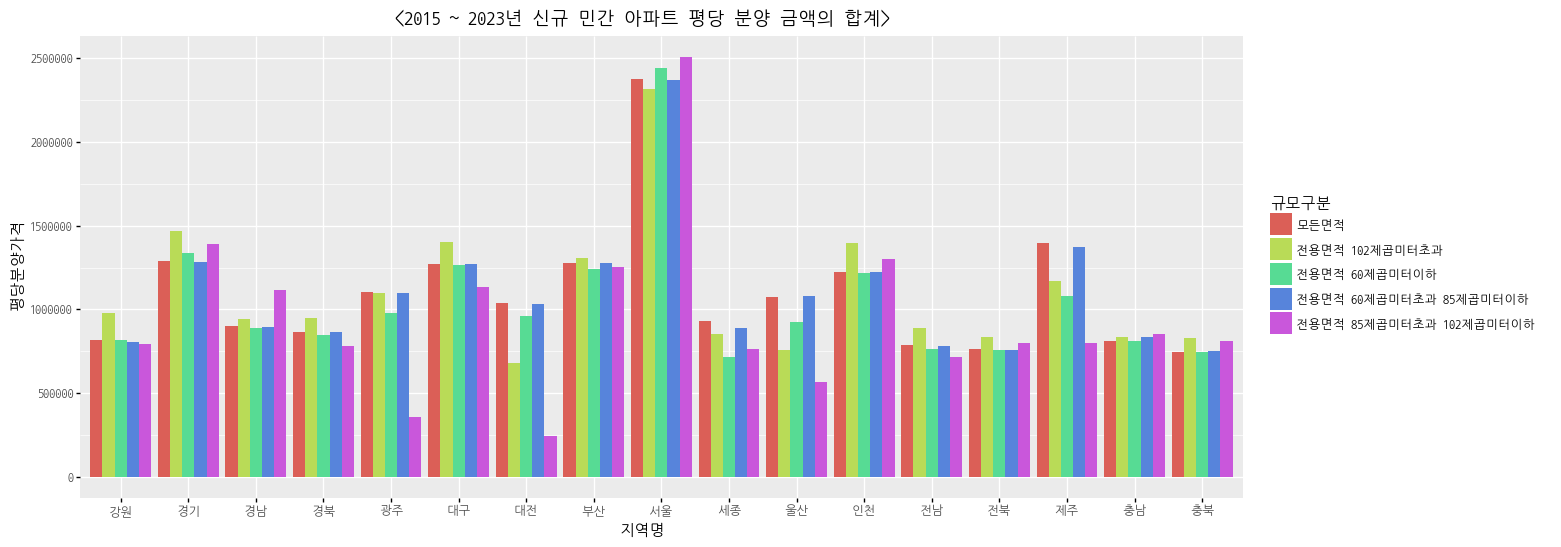

<ggplot: (89181414397)>

In [209]:
# 규모별 지역별 평당 분양 금액 합계 시각화
(
    ggplot(per_sale_melt, aes(x='지역명', y='평당분양가격', fill='규모구분'))
        + geom_bar(stat='identity', position='dodge')
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(15, 6))
        + ggtitle('<2015 ~ 2023년 신규 민간 아파트 평당 분양 금액의 합계>')
)

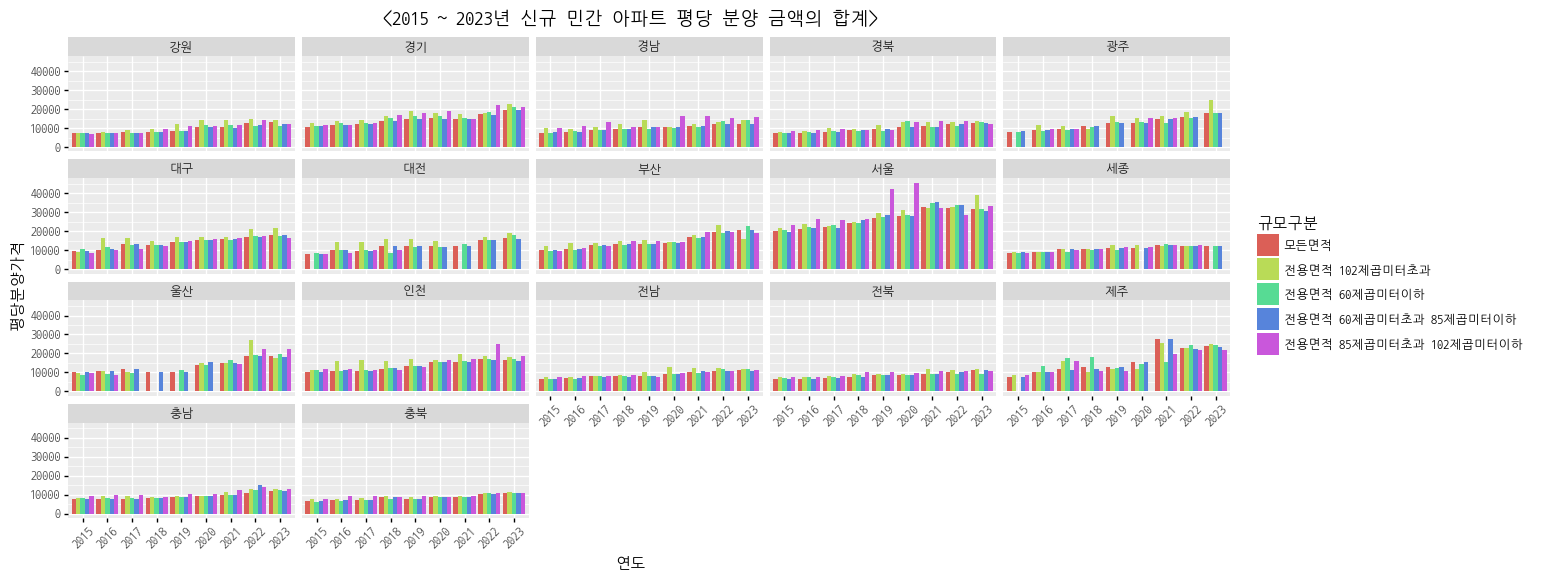

<ggplot: (89181420871)>

In [214]:
# 규모별 지역별 평당 분양 금액 합계 시각화
# position='dodge' => 일반 막대 그래프(기본은 누적 막대 그래프)
# + facet_wrap('지역명') => 전체 그래프에서 지역별로 나눠서 하나씩 보고 싶을 때 사용한다.
# axis_text_x=element_text(rotation=45)) => x축 값의 각도
(
    ggplot(per_sale, aes(x='연도', y='평당분양가격', fill='규모구분'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('지역명')
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(15, 6), axis_text_x=element_text(rotation=45))
        + ggtitle('<2015 ~ 2023년 신규 민간 아파트 평당 분양 금액의 합계>')
)

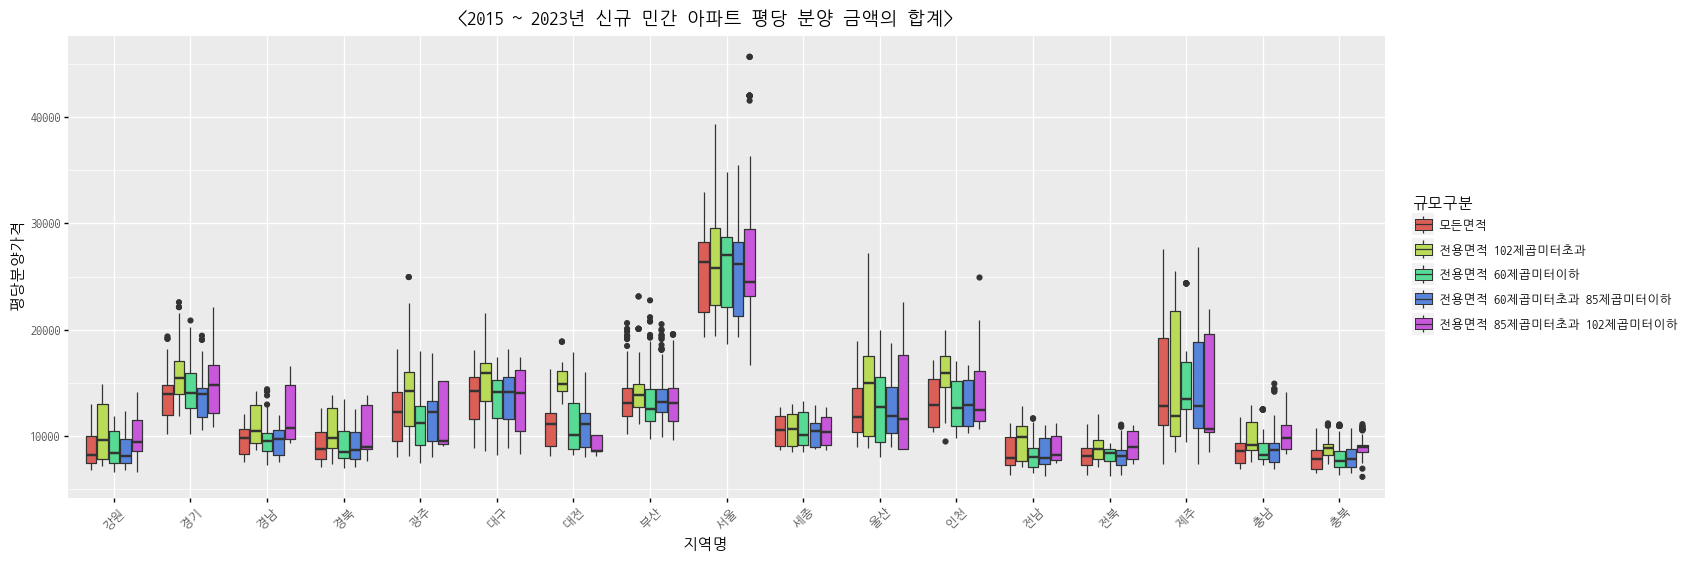

<ggplot: (-9223371947673657442)>

In [218]:
# boxplot을 그려보자.
# 그래프에 나오는 까만점은 평균 금액보다 더 높이 산 사람의 수를 뜻한다.
(
    ggplot(per_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
        + geom_boxplot()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(17, 6), axis_text_x=element_text(rotation=45))
        + ggtitle('<2015 ~ 2023년 신규 민간 아파트 평당 분양 금액의 합계>')
)

In [219]:
# 사업 규모가 가장 컸던 서울
per_sale_seoul = per_sale[per_sale['지역명'] == '서울']
per_sale_seoul

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60제곱미터이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102제곱미터초과,2015,10,"5,879.0","19,400.7"
...,...,...,...,...,...,...
7820,서울,모든면적,2023,6,"9,675.0","31,927.5"
7821,서울,전용면적 60제곱미터이하,2023,6,"9,555.0","31,531.5"
7822,서울,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"9,325.0","30,772.5"
7823,서울,전용면적 85제곱미터초과 102제곱미터이하,2023,6,"10,057.0","33,188.1"


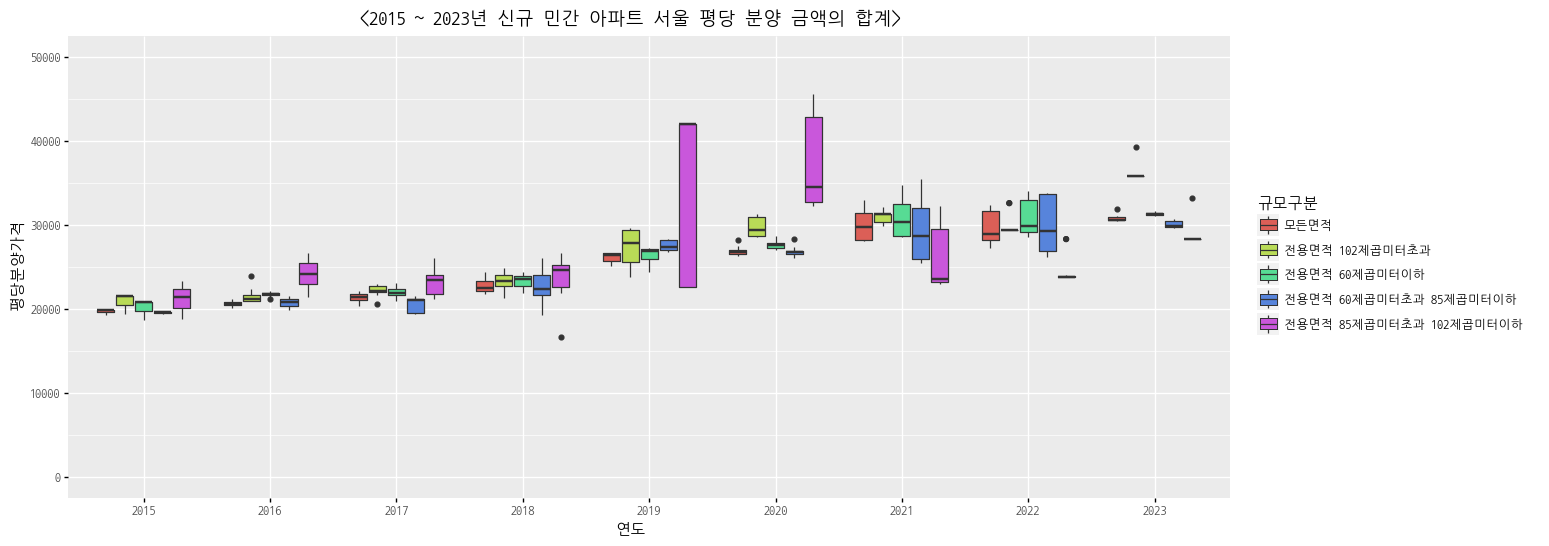

<ggplot: (-9223371947680323801)>

In [228]:
(
    ggplot(per_sale_seoul, aes(x='연도', y='평당분양가격', fill='규모구분'))
        + geom_boxplot()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(15, 6))
        + ggtitle('<2015 ~ 2023년 신규 민간 아파트 서울 평당 분양 금액의 합계>')
        + scale_y_continuous(limits=(0, 50000))
)

In [225]:
# 상승액이 가장 큰 지역 제주
per_sale_jeju = per_sale[per_sale['지역명'] == '제주']
per_sale_jeju

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
80,제주,모든면적,2015,10,"2,232.0","7,365.6"
81,제주,전용면적 60제곱미터이하,2015,10,nan,nan
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225.0","7,342.5"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583.0","8,523.9"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574.0","8,494.2"
...,...,...,...,...,...,...
7900,제주,모든면적,2023,6,"7,326.0","24,175.8"
7901,제주,전용면적 60제곱미터이하,2023,6,"7,381.0","24,357.3"
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"7,084.0","23,377.2"
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,"6,639.0","21,908.7"


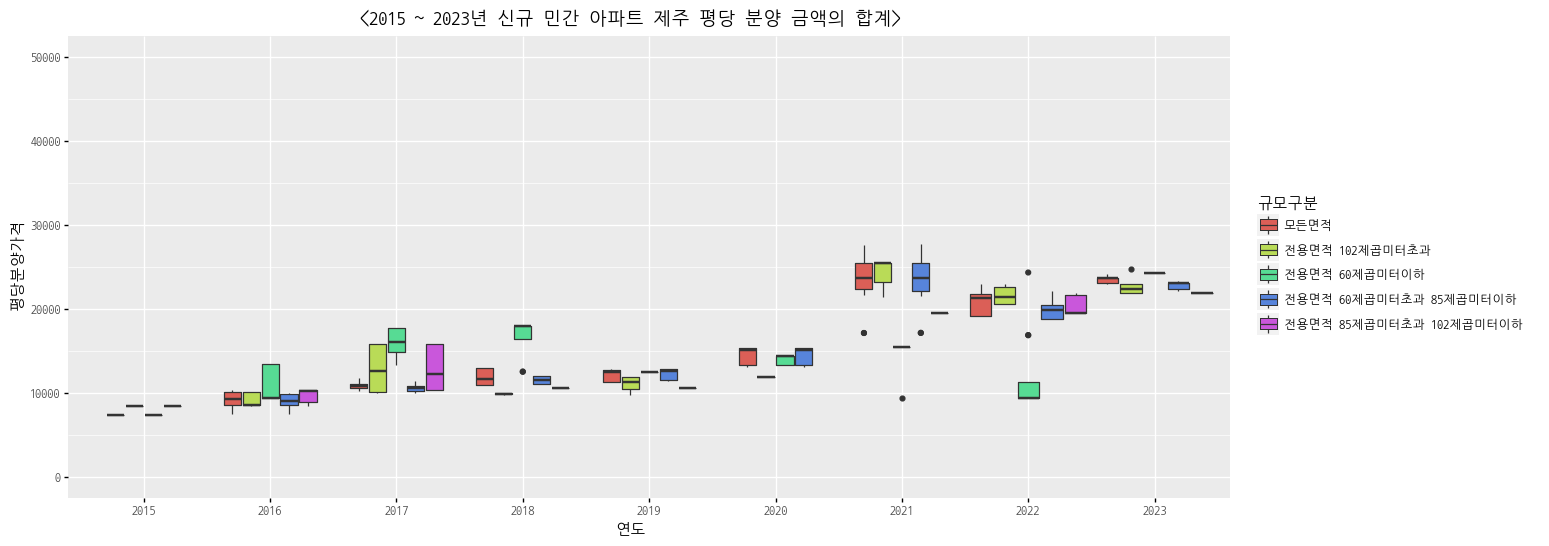

<ggplot: (-9223371947678063251)>

In [230]:
# scale_y_continuous(limits=(0, 50000)) => y축의 전체 리미트 범위 정할 때
(
    ggplot(per_sale_jeju, aes(x='연도', y='평당분양가격', fill='규모구분'))
        + geom_boxplot()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(15, 6))
        + ggtitle('<2015 ~ 2023년 신규 민간 아파트 제주 평당 분양 금액의 합계>')
        + scale_y_continuous(limits=(0, 50000))
)

In [231]:
# 상승액이 가장 작은 지역 => 세종
per_sale_sejong = per_sale[per_sale['지역명'] == '세종']
per_sale_sejong

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
40,세종,모든면적,2015,10,"2,642.0","8,718.6"
41,세종,전용면적 60제곱미터이하,2015,10,"2,572.0","8,487.6"
42,세종,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,657.0","8,768.1"
43,세종,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,644.0","8,725.2"
44,세종,전용면적 102제곱미터초과,2015,10,"2,692.0","8,883.6"
...,...,...,...,...,...,...
7860,세종,모든면적,2023,6,"3,721.0","12,279.3"
7861,세종,전용면적 60제곱미터이하,2023,6,"3,724.0","12,289.2"
7862,세종,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"3,717.0","12,266.1"
7863,세종,전용면적 85제곱미터초과 102제곱미터이하,2023,6,nan,nan


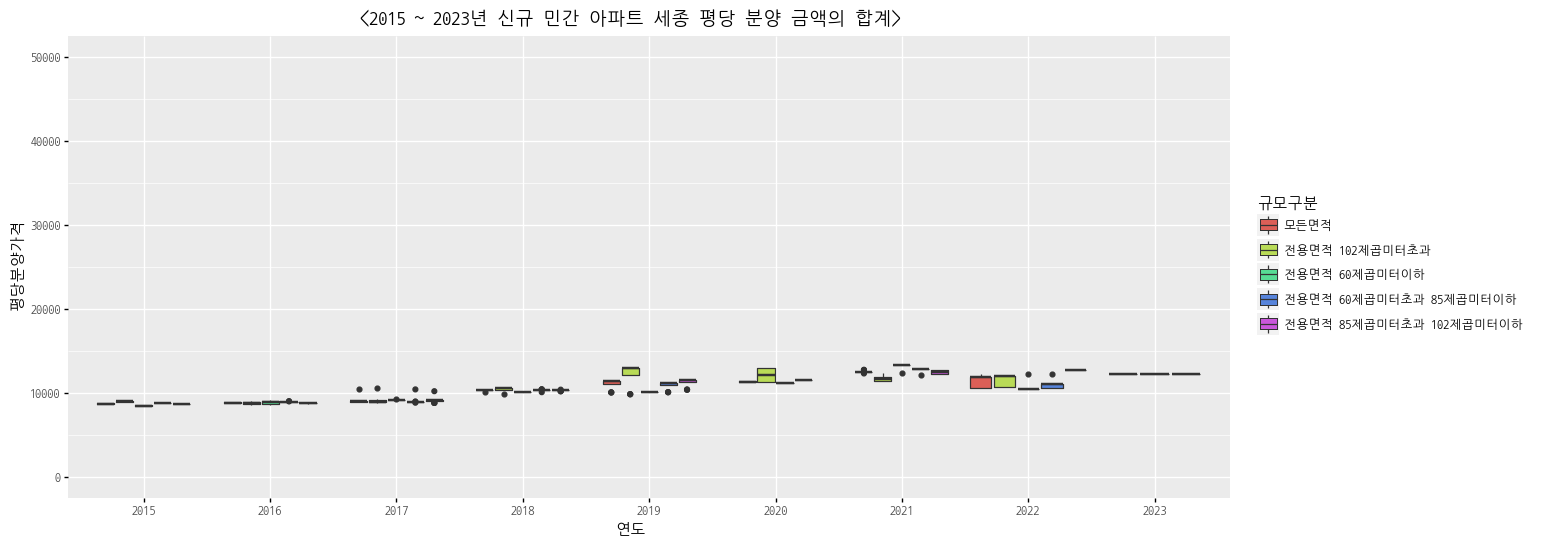

<ggplot: (89178068316)>

In [232]:
(
    ggplot(per_sale_sejong, aes(x='연도', y='평당분양가격', fill='규모구분'))
        + geom_boxplot()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(15, 6))
        + ggtitle('<2015 ~ 2023년 신규 민간 아파트 세종 평당 분양 금액의 합계>')
        + scale_y_continuous(limits=(0, 50000))
)